In [45]:
import pandas as pd 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_csv('credit_data.csv', index_col=0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


**Proses EDA : Univariate Analysis**

In [46]:
n_unique = df.nunique()
print("Banyaknya nilai unik pada data:\n{}".format(n_unique))

Banyaknya nilai unik pada data:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [47]:
print("Nilai unik di setiap kolom Categorical:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Nilai unik di setiap kolom Categorical:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk : ['good' 'bad']


<AxesSubplot:xlabel='Risk', ylabel='count'>

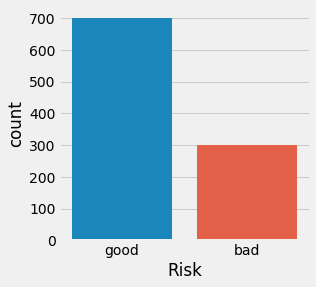

In [48]:
# Mengubah kolom Risiko menjadi numerik
df['Risk']= pd.Categorical(df['Risk'],['good','bad'])
df['Risk']=df['Risk'].cat.codes

a = {0: 'good', 1: 'bad'}
df['Risk'] = df['Risk'].map(a)

plt.figure(figsize=(4,4))
sns.countplot(df.Risk, data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

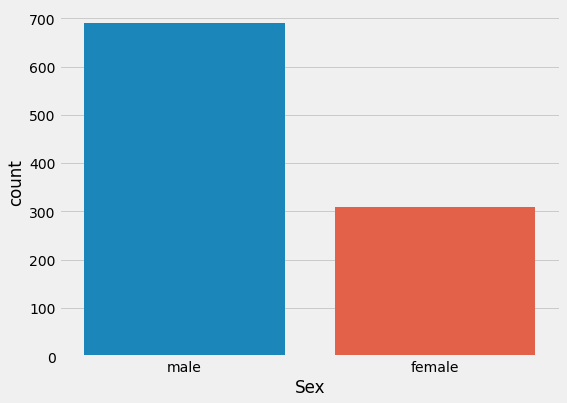

In [49]:
#Age 
plt.figure(figsize=(8,6))
sns.countplot(df.Sex)

<AxesSubplot:title={'center':'Purpose of the credit'}, xlabel='Purpose', ylabel='count'>

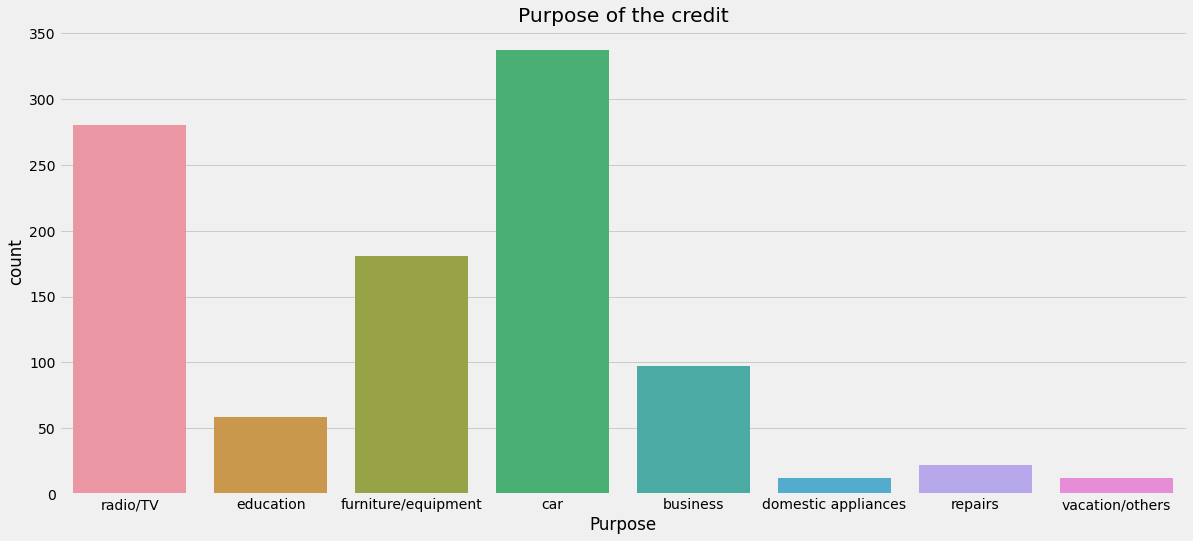

In [50]:
#Purpose of the credit
plt.figure(figsize=(18,8))
plt.title('Purpose of the credit')
sns.countplot(df.Purpose)

<AxesSubplot:title={'center':'Age distribution'}, xlabel='Age', ylabel='Density'>

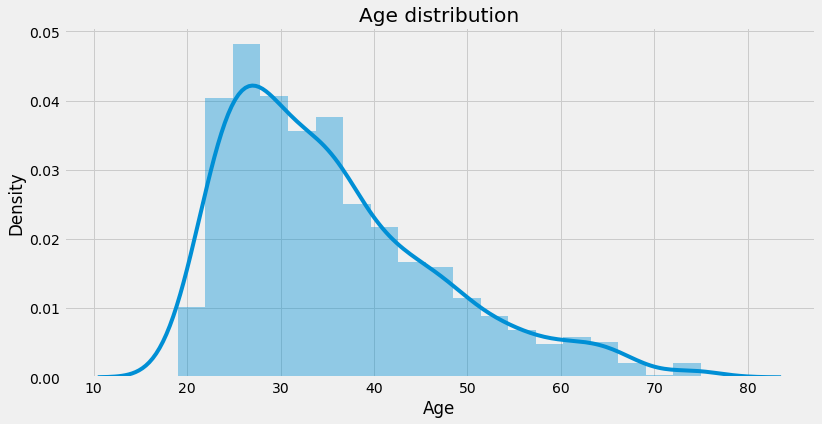

In [51]:
# Mengubah Usia menjadi variabel kategori
category= pd.cut(df.Age,bins=[19,30,60,80], labels=['young', 'Elder','old'])
df.insert(4,'Age Group', category)

#Age distributin
plt.figure(figsize=(12,6))
plt.title('Age distribution')
sns.distplot(df.Age)

<AxesSubplot:xlabel='Age Group', ylabel='count'>

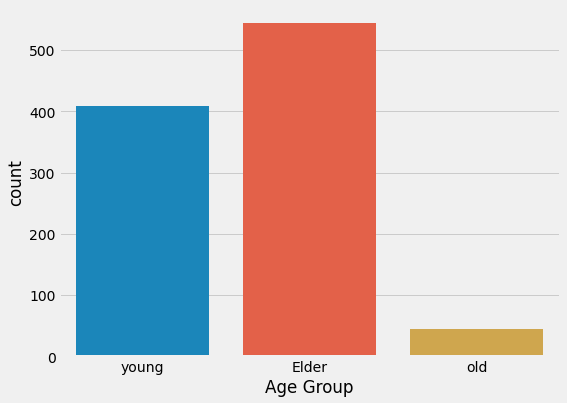

In [52]:
# Age
plt.figure(figsize=(8,6))
sns.countplot(df['Age Group'])

<AxesSubplot:xlabel='Housing', ylabel='count'>

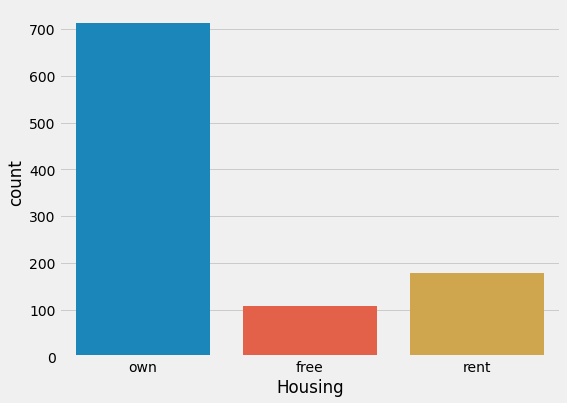

In [53]:
#Housing
plt.figure(figsize=(8,6))
sns.countplot(df.Housing)

<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

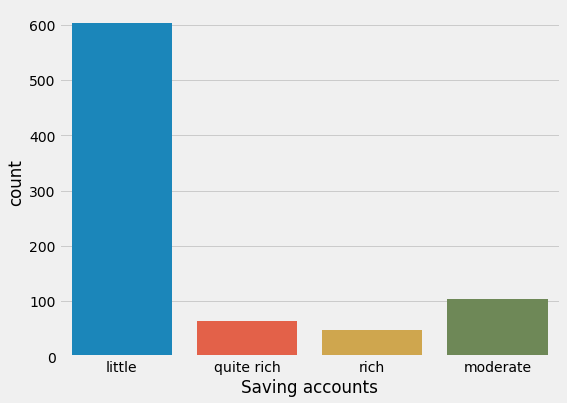

In [54]:
#Saving account
plt.figure(figsize=(8,6))
sns.countplot(df['Saving accounts'])

<AxesSubplot:xlabel='Checking account', ylabel='count'>

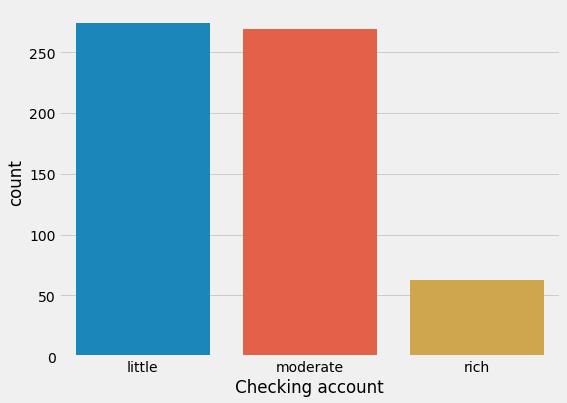

In [55]:
#Checking account
plt.figure(figsize=(8,6))
sns.countplot(df['Checking account'])

<AxesSubplot:title={'center':'Credit amount distribution'}, xlabel='Credit amount', ylabel='Density'>

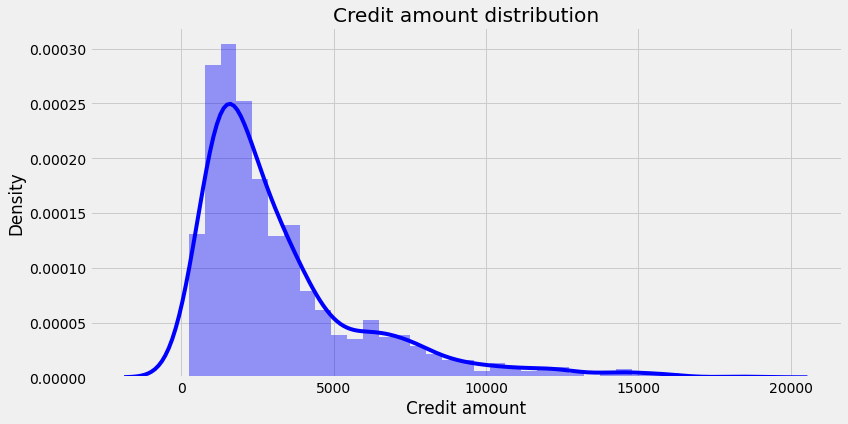

In [56]:
# Credit amount
plt.figure(figsize=(12,6))
plt.title('Credit amount distribution')
sns.distplot(df['Credit amount'], color='blue')

<AxesSubplot:title={'center':'Duration distribution'}, xlabel='Duration', ylabel='Density'>

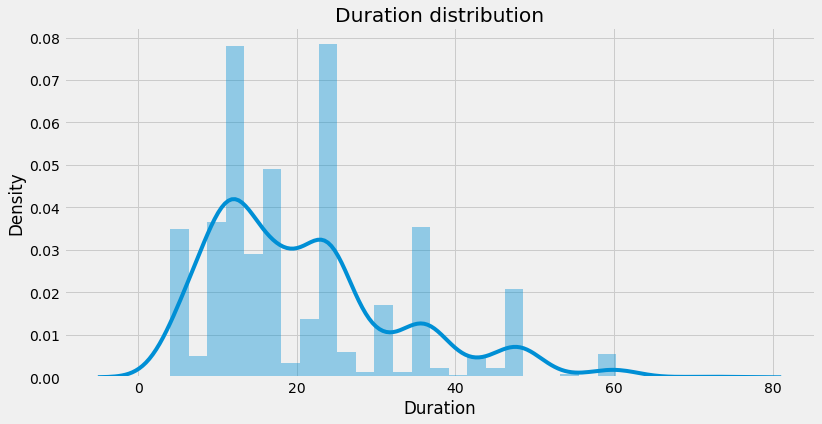

In [57]:
#Duration 
plt.figure(figsize=(12,6))
plt.title('Duration distribution')
sns.distplot(df.Duration)

<AxesSubplot:xlabel='Job', ylabel='count'>

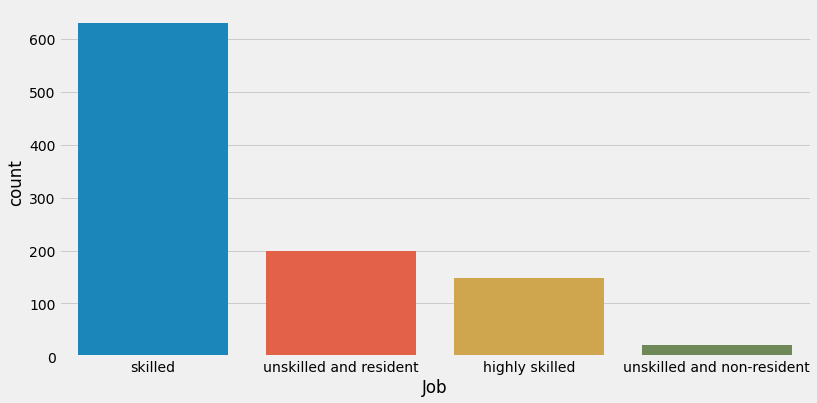

In [58]:
#job
a = {0: 'unskilled and non-resident', 1: 'unskilled and resident', 2: 'skilled', 3: 'highly skilled'}
df['Job'] = df['Job'].map(a)
plt.figure(figsize=(12,6))
sns.countplot(df.Job)

<AxesSubplot:xlabel='Age', ylabel='Density'>

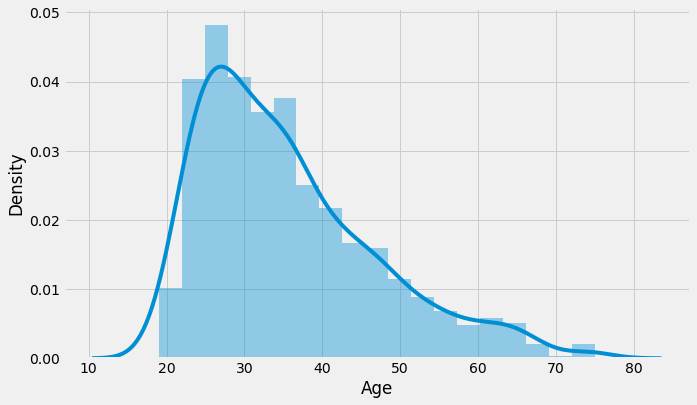

In [59]:
#Age distribution
plt.figure(figsize=(10,6))
sns.distplot(df['Age'])

**Summary**

Kebanyakan orang mengambil pinjaman untuk membeli mobil dan TV. Lebih banyak orang berusia muda mengambil pinjaman dibandingkan dengan orang berusia tua. Jumlah maksimum orang yang mengambil pinjaman berada di bawah kelompok usia tua. 

<AxesSubplot:title={'center':'Age group vs Risk'}, xlabel='Age Group', ylabel='count'>

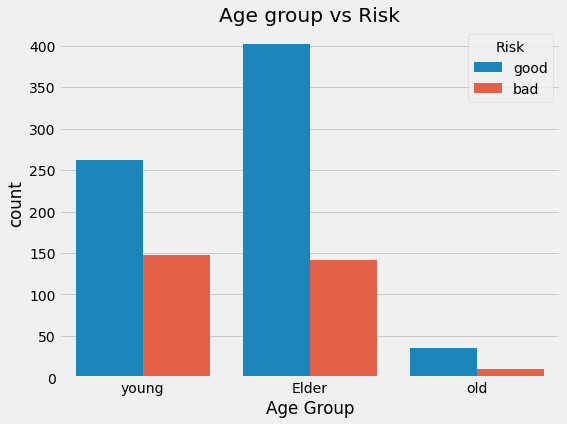

In [60]:
#Risk dengan Age
plt.figure(figsize=(8,6))
plt.title('Age group vs Risk')
sns.countplot(df['Age Group'], data=df, hue='Risk')

<AxesSubplot:title={'center':'Age group vs Purpose'}, xlabel='Age Group', ylabel='count'>

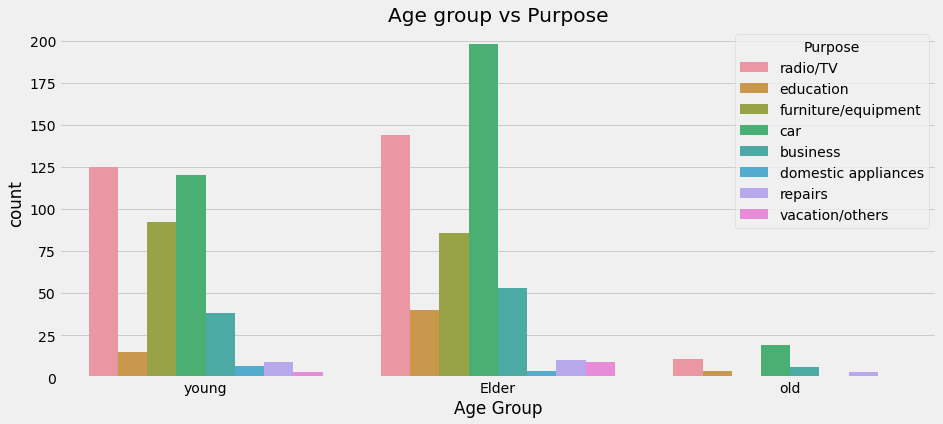

In [61]:
# Age_Group dengan purpose dari credit 
 
plt.figure(figsize=(14,6))
plt.title('Age group vs Purpose')
sns.countplot(df['Age Group'], hue='Purpose', data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

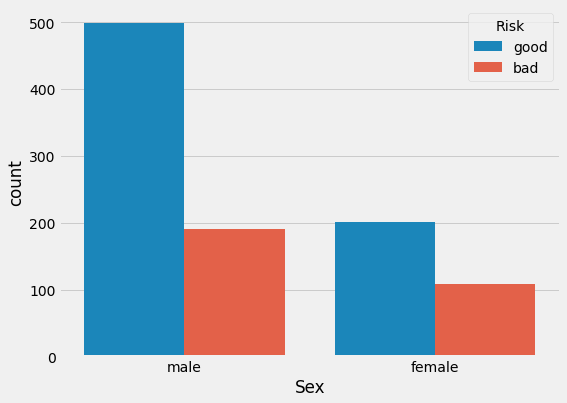

In [62]:
# Risk berdasarkan gender
plt.figure(figsize=(8,6))
sns.countplot(df.Sex, hue='Risk',data=df)

<AxesSubplot:title={'center':'Purpose vs Risk'}, xlabel='Purpose', ylabel='count'>

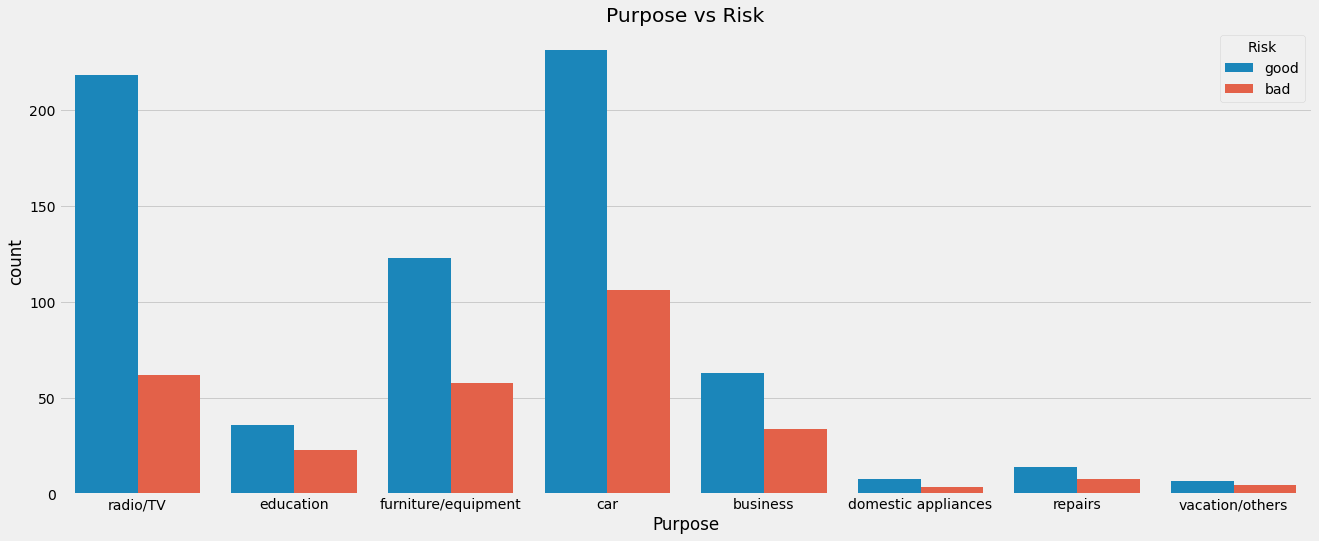

In [63]:
#Purpose and Risk
plt.figure(figsize=(20,8))
plt.title('Purpose vs Risk')
sns.countplot(df.Purpose, hue='Risk',data=df)

<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

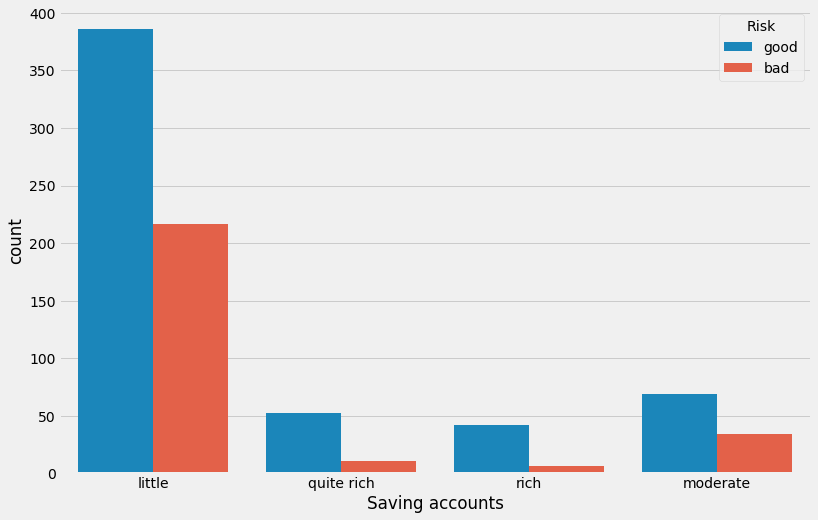

In [64]:
#Risk dengan saving account
plt.figure(figsize=(12,8))
sns.countplot(df['Saving accounts'],data=df, hue='Risk')


<AxesSubplot:xlabel='Checking account', ylabel='count'>

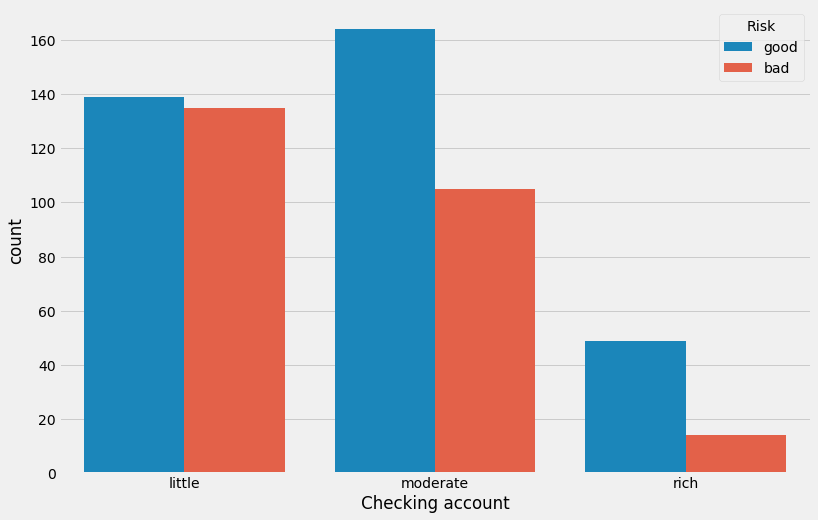

In [65]:
#Saving account dengan Risk
plt.figure(figsize=(12,8))
sns.countplot(df['Checking account'],data=df, hue='Risk')


<AxesSubplot:xlabel='Housing', ylabel='count'>

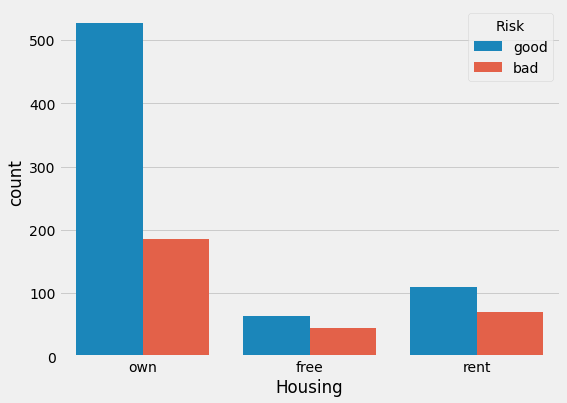

In [66]:
#Housing dan Risk
plt.figure(figsize=(8,6))
sns.countplot(df.Housing, data=df,hue='Risk')

**Summary**

- Kelompok usia yg lebih muda sebagian besar mengambil pinjaman untuk membeli TV/Radio dan Kelompok usia yg lebih tua mengambil pinjaman untuk mobil. 
- Pada kelompok usia muda, risiko (bad-nya) lebih tinggi dari kelompok usia tua.

<AxesSubplot:title={'center':'Correlation variable'}>

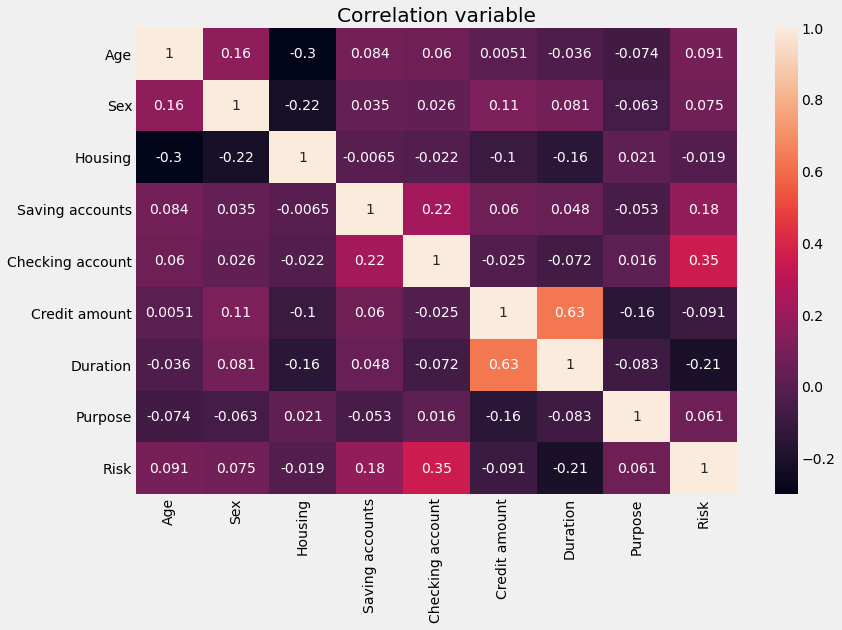

In [67]:
# Korelasi dari beberapa variabel
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df.corr()

df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Housing'] = labelencoder.fit_transform(df['Housing'])
df['Saving accounts'] = labelencoder.fit_transform(df['Saving accounts'])
df['Checking account'] = labelencoder.fit_transform(df['Checking account'])
df['Credit amount'] = labelencoder.fit_transform(df['Credit amount'])
df['Purpose'] = labelencoder.fit_transform(df['Purpose'])
df['Risk'] = labelencoder.fit_transform(df['Risk'])

plt.figure(figsize=(12,8))
plt.title('Correlation variable')
sns.heatmap(df.corr(), annot=True)

**Summary**

Dari matriks korelasi:
- Ada hubungan negatif yang signifikan antara Duration dengan Risiko, dengan berkurangnya durasi pengembalian dana ke bank, maka Risikonya juga semakin berkurang. Begitupun sebaliknya
- Hubungan negatif yg lain terjadi pada variabel Jumlah Kredit dengan Risko, semakin kecil jumlah kredit yang diajukan customer, maka Risikonya juga semakin berkurang. Begitupun sebaliknya

**Customer Segmentation**

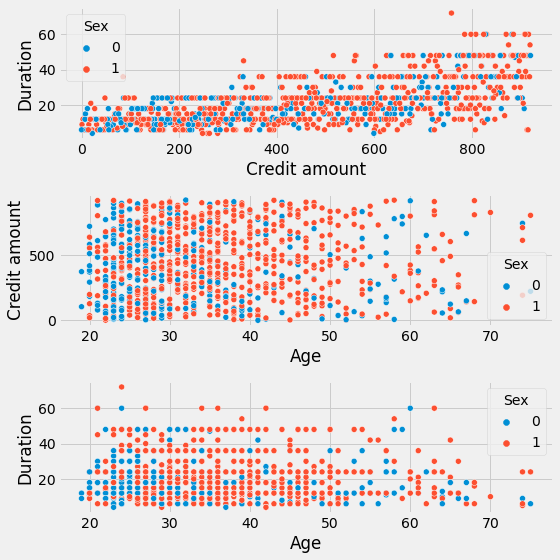

In [68]:
def scatters(df, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=df, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=df, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=df, ax=ax3)
    plt.tight_layout()
    
scatters(df, h="Sex")

**Summary**

Perempuan cenderung lebih muda dari laki-laki, tapi plot diatas menunjukkan bahwa tidak ada perbedaan yang jelas antara laki-laki dan perempuan dalam hal jumlah dan durasi kredit. Dari hasil pemeriksaan visual ini, sepertinya ada korelasi positif antara durasi dan jumlah kredit

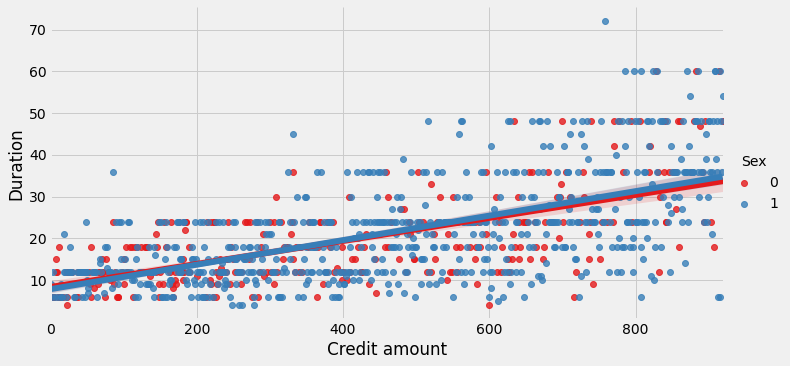

In [69]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=df, palette="Set1", aspect=2)
plt.show()

**Summary**

Tidak ada hubungan signifikan antara laki2 dan perempuan, artinya mau laki2 atau perempuan tidak mempengaruhi jumlah pinjaman dan juga durasi. Semua yg mereka pilih sesuai dengan kebutuhan mereka ketika ingin meminjam atau mengajukan kredit

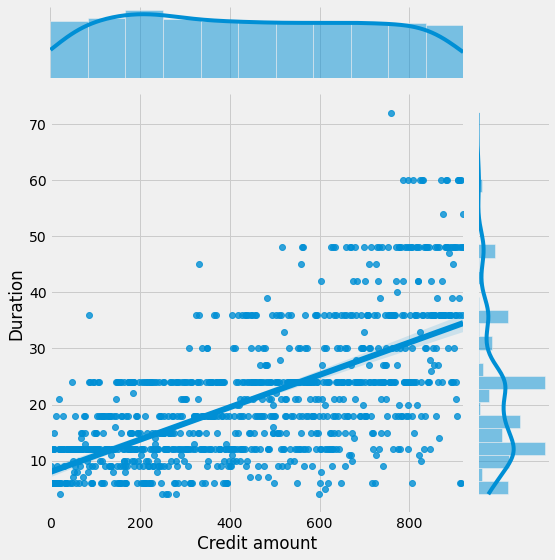

In [70]:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=df, kind="reg", height=8)
plt.show()

**Summary**

Plot diatas menunjukkan bahwa semakin besar jumlah pinjaman, maka semakin lama juga durasi pengembalian nya 

**KMeans Clustering**

In [71]:
df = pd.read_csv('credit_data.csv', index_col=0)

In [72]:
# Memilih kolom untuk clusterisasi dengan k-means
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = df.loc[:,selected_cols]

def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

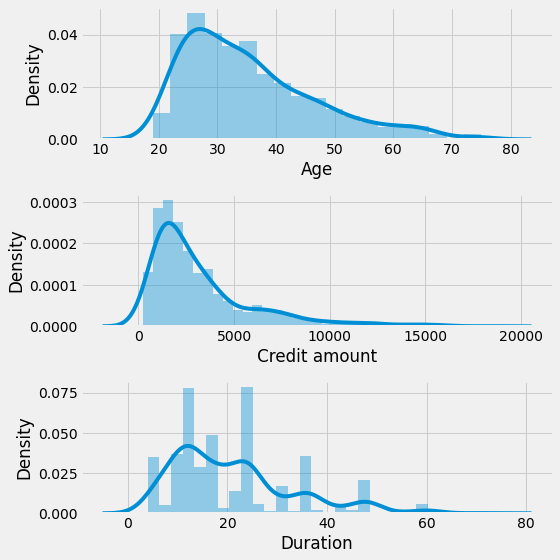

In [73]:
distributions(cluster_data)

Distribusi nya miring ke kanan. Supaya mendapat hasil lebih baik, maka harus menghilangkan skewness dengan transformasi logaritmik

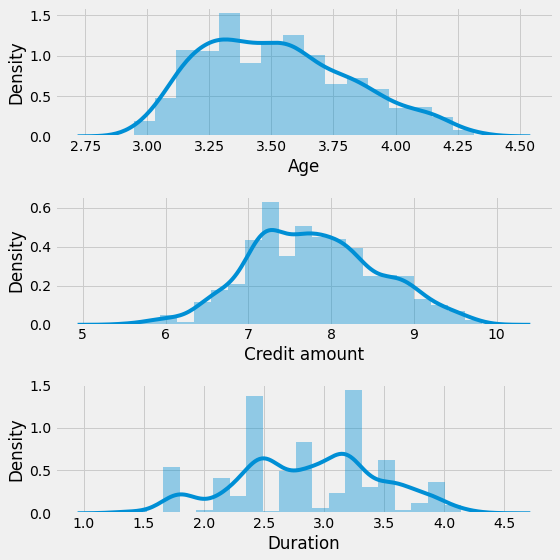

In [74]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

Langkah selanjutnya, pemusatan dan penskalaan variabel pakai StandardScaler. Hal ini diperlukan untuk Algoritma KMeans

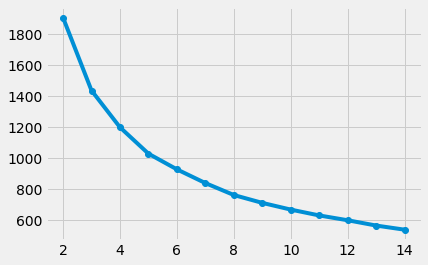

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

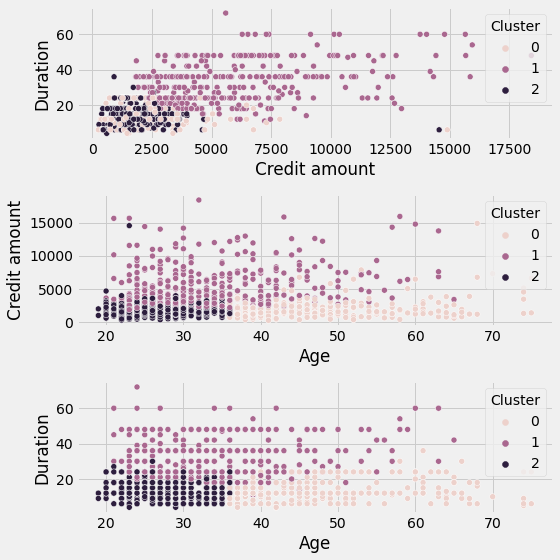

In [76]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

scatters(clustered_data, 'Cluster')

In [77]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km
# grouped_km.to_excel('hasil klaster.xlsx')

,Age,Credit amount,Duration
Cluster,,,
0,48.5,1970.3,13.9
1,34.0,5665.4,32.2
2,27.7,1736.3,14.3


**Summary**

Cluster 0 –  rata-rata jumlah kredit yg lebih rendah, durasi pendek, customer dengan kelompok usia lebih tua

Cluster 1 – rata-rata jumlah kredit yg tinggi, durasi panjang, customer dengan kelompok usia pertengahan (muda---tua)

Cluster 2 - rata-rata jumlah kredit yg lebih rendah, durasi pendek, customer dengan kelompok usia lebih muda

**Preprocessing Data untuk Modelling**

In [78]:
df = pd.read_csv('credit_data.csv', index_col=0)
df

In [79]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [80]:
for col in ['Saving accounts', 'Checking account']:
    df[col].fillna('none', inplace=True)


In [81]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [83]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Housing'] = labelencoder.fit_transform(df['Housing'])
df['Saving accounts'] = labelencoder.fit_transform(df['Saving accounts'])
df['Checking account'] = labelencoder.fit_transform(df['Checking account'])
df['Credit amount'] = labelencoder.fit_transform(df['Credit amount'])
df['Purpose'] = labelencoder.fit_transform(df['Purpose'])
df['Risk'] = labelencoder.fit_transform(df['Risk'])

In [39]:
# Split menjadi data training dan data latih
from sklearn.model_selection import train_test_split
X = df.drop(['Risk'], axis=1).values
y = df['Risk'].values

# 90% data digunakan untuk data training dan sisa nya sbg data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)

In [40]:
# Proses membalance-kan data training
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

**Modelling**

In [41]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB



In [42]:
# Gradient Boosting punya akurasi paling baik
gb = GradientBoostingClassifier()
results = gb.fit(X_smote, y_smote)
y_pred_gb = gb.predict(X_test)
print(accuracy_score(y_pred_gb, y_test))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Save model hasil latihan nya
import pickle
filename = 'model.pkl'
pickle.dump(results, open(filename, 'wb'))

0.82
[[23  6]
 [12 59]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        29
           1       0.91      0.83      0.87        71

    accuracy                           0.82       100
   macro avg       0.78      0.81      0.79       100
weighted avg       0.84      0.82      0.82       100



In [43]:
log = LogisticRegression()
log.fit(X_smote, y_smote)
y_pred_log = log.predict(X_test)
print(accuracy_score(y_pred_log, y_test))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

0.79
[[25  4]
 [17 54]]
              precision    recall  f1-score   support

           0       0.60      0.86      0.70        29
           1       0.93      0.76      0.84        71

    accuracy                           0.79       100
   macro avg       0.76      0.81      0.77       100
weighted avg       0.83      0.79      0.80       100



In [44]:
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_pred_rf, y_test))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


0.78
[[19 10]
 [12 59]]
              precision    recall  f1-score   support

           0       0.61      0.66      0.63        29
           1       0.86      0.83      0.84        71

    accuracy                           0.78       100
   macro avg       0.73      0.74      0.74       100
weighted avg       0.78      0.78      0.78       100



In [45]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_smote, y_smote)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_pred_knn, y_test))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.62
[[10 19]
 [19 52]]
              precision    recall  f1-score   support

           0       0.34      0.34      0.34        29
           1       0.73      0.73      0.73        71

    accuracy                           0.62       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.62      0.62      0.62       100



In [46]:
nb = GaussianNB()
nb.fit(X_smote, y_smote)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_pred_nb, y_test))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
    


0.79
[[25  4]
 [17 54]]
              precision    recall  f1-score   support

           0       0.60      0.86      0.70        29
           1       0.93      0.76      0.84        71

    accuracy                           0.79       100
   macro avg       0.76      0.81      0.77       100
weighted avg       0.83      0.79      0.80       100



In [47]:
xgb = XGBClassifier(eta=0.19, max_depth=8, n_estimators=150, subsample=0.8, colsample_bytree=1)
xgb.fit(X_smote, y_smote)
y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_pred_xgb, y_test))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[11:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.81
[[19 10]
 [ 9 62]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        29
           1       0.86      0.87      0.87        71

    accuracy                           0.81       100
   macro avg       0.77      0.76      0.77       100
weighted avg       0.81      0.81      0.81       100



**Deployment**

In [48]:
# Jika input nya secara manual satu per satu data di masukkan 
# Dan data sudah dalam label encoder
input = [[24,0,2,1,0,0,582,18,5]]
output = gb.predict(input)
output

array([0])

In [49]:
# Jika input data tes nya dilakukan secara otomatis dalam satu file excel
# Dan data nya masih mengandung categorical
# Serta model Machine Learning nya sudah di save menjadi pickle
test = pd.read_excel('data test.xlsx')

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Data test nya di label encoder terlebih dahulu
test['Sex'] = labelencoder.fit_transform(test['Sex'])
test['Housing'] = labelencoder.fit_transform(test['Housing'])
test['Saving accounts'] = labelencoder.fit_transform(test['Saving accounts'])
test['Checking account'] = labelencoder.fit_transform(test['Checking account'])
test['Credit amount'] = labelencoder.fit_transform(test['Credit amount'])
test['Purpose'] = labelencoder.fit_transform(test['Purpose'])

# Prediksi menggunakan Model Gradient Boosting Classifier yg sebelumnya sudah di save menjadi pickle
model = pickle.load(open('model.pkl', 'rb'))
prediksi = model.predict(test)

# Data test tanpa diberikan label untuk memberikan hasil export data yg lebih interaktif
no_label = pd.read_excel('data test.xlsx')

# Proses export data hasil prediksi
hasil = pd.DataFrame()
hasil['Age'] = no_label['Age']
hasil['Sex'] = no_label['Sex']
hasil['Job'] = no_label['Job']
hasil['Housing'] = no_label['Housing']
hasil['Saving accounts'] = no_label['Saving accounts']
hasil['Checking account'] = no_label['Checking account']
hasil['Credit amount'] = no_label['Credit amount']
hasil['Duration'] = no_label['Duration']
hasil['Purpose'] = no_label['Purpose']
hasil['Risk prediction'] = prediksi

# Kasih keterangan juga kalo 0 dan 1 mendeskripsikan apa dalam data test
a = {0: 'good', 1: 'bad'}
hasil['Risk prediction'] = hasil['Risk prediction'].map(a)

b = {0: 'unskilled and non-resident', 1: 'unskilled and resident', 2: 'skilled', 3: 'highly skilled'}
hasil['Job'] = hasil['Job'].map(b)

print(hasil['Risk prediction'].value_counts())
hasil.to_excel('hasil.xlsx',index=False)
hasil

bad     31
good    20
Name: Risk prediction, dtype: int64


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk prediction
0,24,male,skilled,own,little,NaN,1800,18,radio/TV,bad
1,40,male,highly skilled,rent,little,rich,1905,15,education,bad
2,29,female,unskilled and resident,rent,quite rich,NaN,1123,12,furniture/equipment,bad
3,46,male,skilled,free,little,little,6331,48,car,good
4,47,female,skilled,free,moderate,rich,1377,24,radio/TV,bad
5,41,male,skilled,own,moderate,moderate,2503,30,business,bad
6,32,female,skilled,own,little,moderate,2528,27,business,good
7,35,female,skilled,free,quite rich,NaN,5324,15,car,good
8,24,male,skilled,own,moderate,moderate,6560,48,car,good
9,25,female,skilled,rent,little,moderate,2969,12,furniture/equipment,good
